In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

df=pd.read_csv('/content/gdrive/My Drive/Social_Network_Ads.csv')

Mounted at /content/gdrive


In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape

(400, 5)

In [6]:
df.drop(['User ID'],inplace=True,axis=1)

In [7]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [10]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [11]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [13]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


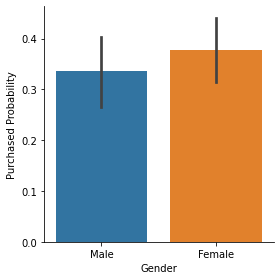

In [15]:
g=sns.catplot(x='Gender',y='Purchased',data=df,kind='bar',height=4)
g.set_ylabels("Purchased Probability")
plt.show()

Purchased         0         1
Gender                       
Female     0.622549  0.377451
Male       0.663265  0.336735


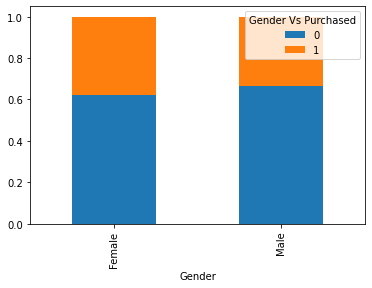

In [17]:
M2=pd.crosstab(df.Gender,df.Purchased,normalize="index")
print(M2)

M2.plot.bar(figsize=(6,4),stacked=True)
plt.legend(title="Gender Vs Purchased",loc='upper right')
plt.show()

(3, 3)


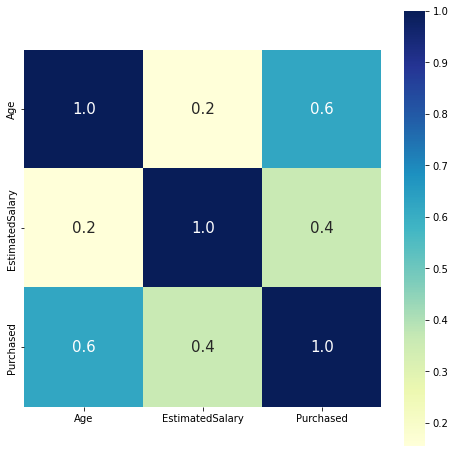

In [20]:
corr=df.corr()
print(corr.shape)

plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':15},cmap="YlGnBu")

In [21]:
X=df.drop(['Gender','Purchased'],axis=1)
Y=df['Purchased']
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
print("Training accuracy : "+str(model.score(X_train,y_train)*100)+"%")

Training accuracy : 64.0625%


In [25]:
y_predict=model.predict(X_test)
print("Testing accuracy : "+str(model.score(X_test,y_test)*100)+"%")

Testing accuracy : 65.0%


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X=df[['Age','EstimatedSalary']]
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

In [27]:
model=LogisticRegression()
model.fit(X_train,y_train)
print("Training accuracy (After Normalization) : "+str(model.score(X_train,y_train)*100)+"%")

Training accuracy (After Normalization) : 80.9375%


In [28]:
y_predict=model.predict(X_test)
print("Testing accuracy (After Normalization) : "+str(model.score(X_test,y_test)*100)+"%")

Testing accuracy (After Normalization) : 87.5%



F1 Score (Macro):  0.8511904761904763
F1 Score (Micro):  0.875
F1 Score (Weighted):  0.869047619047619

Precision Score (Macro):  0.8999999999999999
Precision Score (Micro):  0.875
Precision Score (Weighted):  0.885

Recall Score (Macro):  0.8296703296703296
Recall Score (Micro):  0.875
Recall Score (Weighted):  0.875



              precision    recall  f1-score   support

           0       0.85      0.98      0.91        52
           1       0.95      0.68      0.79        28

    accuracy                           0.88        80
   macro avg       0.90      0.83      0.85        80
weighted avg       0.89      0.88      0.87        80






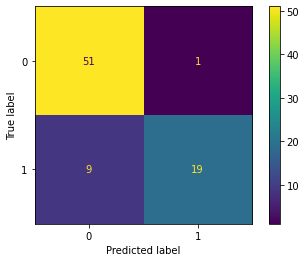

In [32]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay ,accuracy_score,f1_score,precision_score,recall_score,classification_report


cm = confusion_matrix(y_test, y_predict,labels=model.classes_)

print ("\nF1 Score (Macro): ", f1_score(y_test, y_predict,average="macro"))
print ("F1 Score (Micro): ", f1_score(y_test, y_predict,average="micro"))
print ("F1 Score (Weighted): ", f1_score(y_test, y_predict,average="weighted"))

print ("\nPrecision Score (Macro): ", precision_score(y_test, y_predict,average="macro"))
print ("Precision Score (Micro): ", precision_score(y_test, y_predict,average="micro"))
print ("Precision Score (Weighted): ", precision_score(y_test, y_predict,average="weighted"))

print ("\nRecall Score (Macro): ", recall_score(y_test, y_predict,average="macro"))
print ("Recall Score (Micro): ", recall_score(y_test, y_predict,average="micro"))
print ("Recall Score (Weighted): ", recall_score(y_test, y_predict,average="weighted"))

print("\n\n")

classiReport=classification_report(y_test,y_predict)
print(classiReport)
print("\n\n")


cmd=ConfusionMatrixDisplay(cm,display_labels=model.classes_)
cmd.plot()
plt.show()